In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import statsmodels.api as sm

In [81]:
moving_averages = pd.read_excel("moving_average__S14.xlsx")

In [82]:
df = pd.DataFrame(moving_averages)
df

,week,elAppWT,elScanWT,urScanWT,OT,elTardiness
0,0,11.26,0.07,3.85,0.92,0.013
1,1,11.60,0.06,2.74,0.90,0.012
2,2,20.77,0.09,2.57,0.90,0.015
3,3,27.29,0.05,3.13,0.83,0.012
4,4,30.52,0.05,3.59,1.14,0.013
...,...,...,...,...,...,...
9995,9995,14.54,0.06,2.66,0.97,0.014
9996,9996,13.28,0.05,2.34,0.06,0.013
9997,9997,7.13,0.06,3.37,1.85,0.013
9998,9998,17.73,0.07,3.63,1.25,0.009


In [83]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [84]:
df

,elAppWT,elScanWT,urScanWT,OT,elTardiness
0,11.26,0.07,3.85,0.92,0.013
1,11.60,0.06,2.74,0.90,0.012
2,20.77,0.09,2.57,0.90,0.015
3,27.29,0.05,3.13,0.83,0.012
4,30.52,0.05,3.59,1.14,0.013
...,...,...,...,...,...
9995,14.54,0.06,2.66,0.97,0.014
9996,13.28,0.05,2.34,0.06,0.013
9997,7.13,0.06,3.37,1.85,0.013
9998,17.73,0.07,3.63,1.25,0.009


<AxesSubplot:>

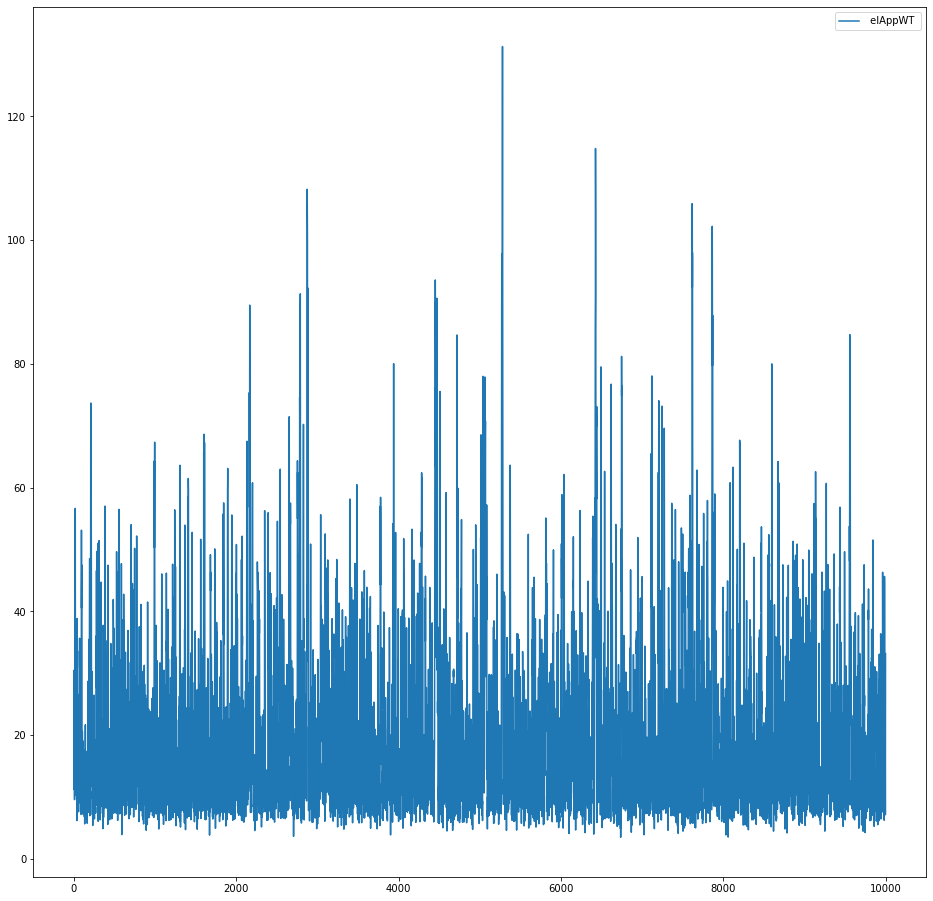

In [85]:
df.plot(y=df.columns[0],figsize=(16,16))

In [86]:
df2 = df.loc[350:9999]

In [87]:
df2

,elAppWT,elScanWT,urScanWT,OT,elTardiness
350,10.45,0.06,2.47,0.22,0.010
351,8.48,0.05,2.98,0.34,0.014
352,7.32,0.07,1.93,0.13,0.016
353,7.58,0.08,2.75,0.85,0.014
354,12.38,0.05,2.53,1.48,0.013
...,...,...,...,...,...
9995,14.54,0.06,2.66,0.97,0.014
9996,13.28,0.05,2.34,0.06,0.013
9997,7.13,0.06,3.37,1.85,0.013
9998,17.73,0.07,3.63,1.25,0.009


In [108]:
list(df2.columns.values)

[' elAppWT ', ' elScanWT ', ' urScanWT ', ' OT ', ' elTardiness ']

In [110]:
df2.columns = ['elAppWT',"elScanWT","urScanWT","OT","elTardiness"]
df2['elAppWT']

350     10.45
351      8.48
352      7.32
353      7.58
354     12.38
        ...  
9995    14.54
9996    13.28
9997     7.13
9998    17.73
9999    33.17
Name: elAppWT, Length: 9650, dtype: float64

In [114]:
df2.loc[:,'mean'] = mean


In [121]:
df2['res'] = abs(df2['elAppWT']-df2['mean'])

<ipython-input-121-de8cc7b1f0ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['res'] = abs(df2['elAppWT']-df2['mean'])


In [146]:
def Jungbox(lag):
    output = sm.stats.acorr_ljungbox(df2['res'], lags=[lag], return_df=True)
    while(output['lb_pvalue'].values < 0.05):
        lag = lag + 1
    return lag

In [147]:
Jungbox(5)

KeyboardInterrupt: 

In [156]:
sm.stats.acorr_ljungbox(df2['res'], lags=[9000], return_df=True)

,lb_stat,lb_pvalue
9000,46900.010749,0.0


In [142]:
if(output['lb_pvalue'].values < 0.5):
    print('4')

4


0.22953521592183446